In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import warnings

warnings.filterwarnings('ignore')

In [2]:
random_state = 42
n_samples = 2000
n_features = 10
n_classes = 2
noise_moon = 0.3
noise_circle = 0.3
noise_class = 0.3

# Create classification dataset
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, n_repeated=0,
                           n_redundant=0, n_informative=n_features-1, random_state=random_state, 
                           n_clusters_per_class=1, flip_y=noise_class)
data = pd.DataFrame(X)
data["target"] = y


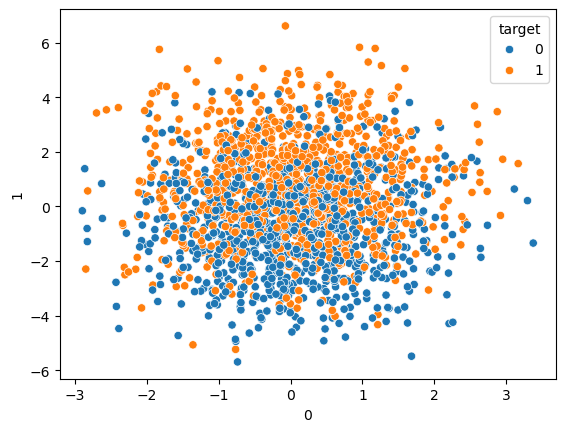

In [3]:
plt.figure()
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue="target", data=data)
plt.show()

data_classification = (X, y)


In [7]:
moon = make_moons(n_samples=n_samples, noise=noise_moon, random_state=random_state)
circle = make_circles(n_samples=n_samples, factor=0.1, noise=noise_circle, random_state=random_state)
datasets = [moon, circle]

In [10]:
n_estimators = 10
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=15)
dt = DecisionTreeClassifier(random_state=random_state, max_depth=2)
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, max_depth=2)
ada = AdaBoostClassifier(estimator=dt, n_estimators=n_estimators, random_state=random_state)
v1 = VotingClassifier(estimators=[('svc', svc), ('knn', knn), ('dt', dt), ('rf', rf), ('ada', ada)])

names = ["SVC", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "V1"]
classifiers = [svc, knn, dt, rf, ada, v1]


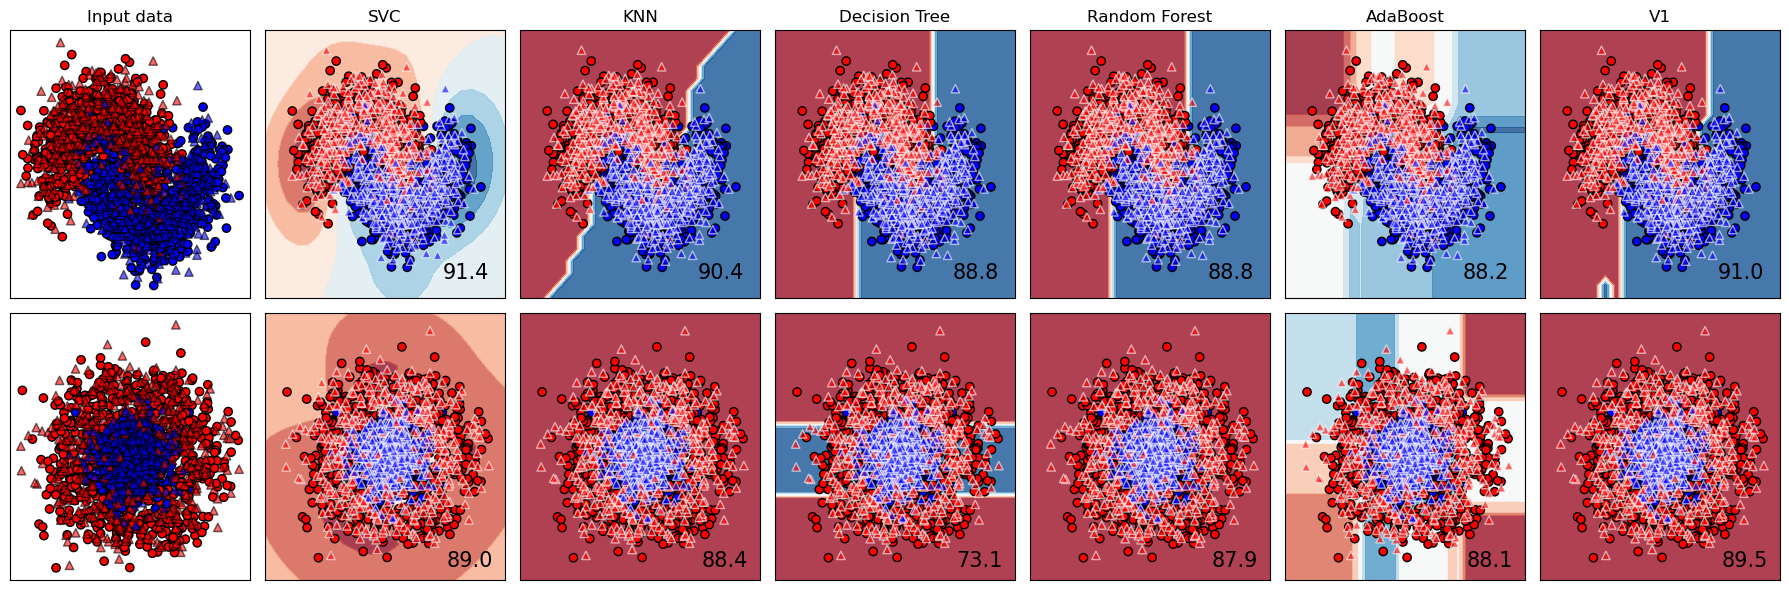

In [11]:
h = 0.2
figure = plt.figure(figsize=(18, 6))
i = 1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, marker='^', edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        score_train = clf.score(X_train, y_train)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='^', edgecolors='white', alpha=0.6)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % (score * 100)), size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()


In [12]:
def make_classify(dc, classifiers, names):
    X, y = dc
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        score_train = clf.score(X_train, y_train)
        print(f"{name}: test set score: {score}")
        print(f"{name}: train set score: {score_train}\n")

print("Dataset # 2")   
make_classify(data_classification, classifiers, names)


Dataset # 2
SVC: test set score: 0.83875
SVC: train set score: 0.8666666666666667

KNN: test set score: 0.835
KNN: train set score: 0.8583333333333333

Decision Tree: test set score: 0.77
Decision Tree: train set score: 0.7708333333333334

Random Forest: test set score: 0.7775
Random Forest: train set score: 0.8058333333333333

AdaBoost: test set score: 0.79
AdaBoost: train set score: 0.8416666666666667

V1: test set score: 0.8375
V1: train set score: 0.8575

